<a href="https://colab.research.google.com/github/actuallyADITYYA/CN6005/blob/main/week5_CNN_XAI_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from tensorflow.keras.layers import BatchNormalization,Flatten,Dropout,Dense,Conv2D,MaxPooling2D
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [8]:
print(X_train.shape)
print(X_train[0])

(50000, 32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


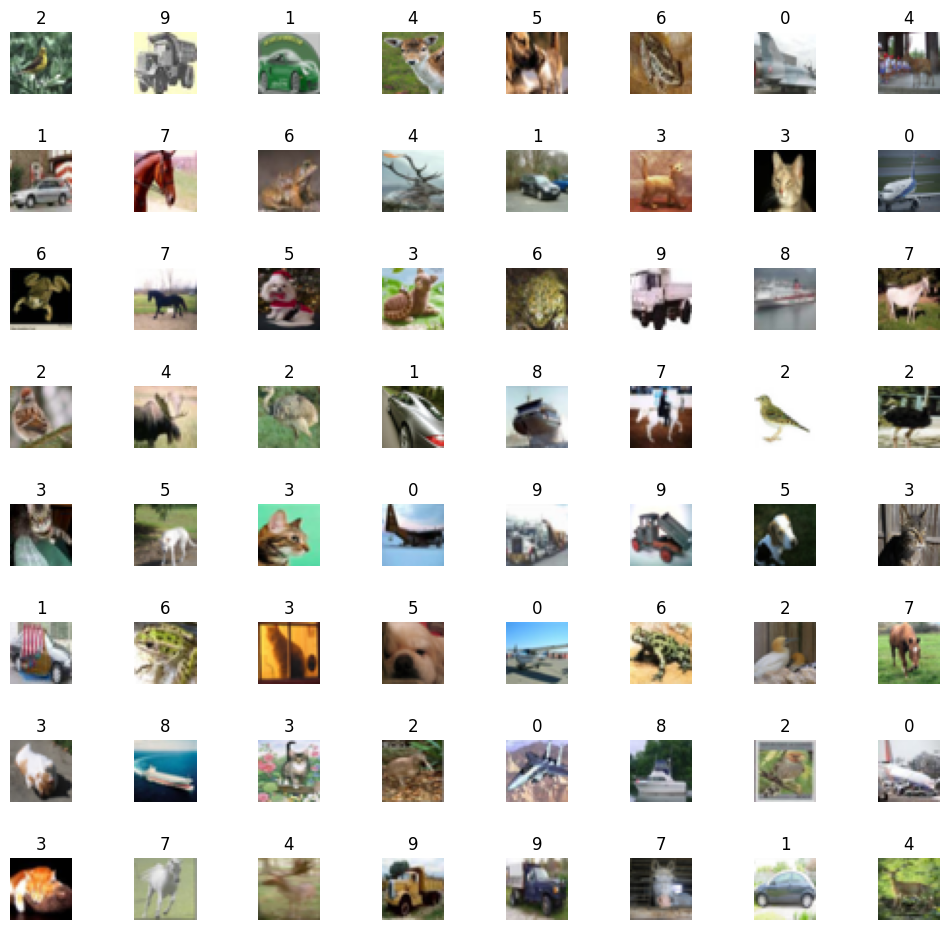

In [9]:
# Display some images
from sklearn.utils import shuffle
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt


    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(Y_rand.item(i)))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return
num_row = 8
num_col = 8
showImages(num_row,num_col,X =X_train,Y = y_train)

In [11]:
# Preprocessing the dataset
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(-1,32,32,3)
X_test = X_test.reshape(-1,32,32,3)

In [16]:
print(X_test[1:5].shape)

(4, 32, 32, 3)


In [17]:
print(predictions.shape)
print(y_test.shape)

(99,)
(10000, 1)


In [18]:
model_pooling = Sequential()
model_pooling.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32, 32, 3), kernel_initializer='he_normal'))
model_pooling.add(BatchNormalization())
model_pooling.add(Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model_pooling.add(BatchNormalization())
model_pooling.add(MaxPooling2D(pool_size=2))
model_pooling.add(Dropout(0.3))
model_pooling.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model_pooling.add(BatchNormalization())
model_pooling.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model_pooling.add(BatchNormalization())
model_pooling.add(MaxPooling2D(pool_size=2))
model_pooling.add(Dropout(0.3))
model_pooling.add(Conv2D(128, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model_pooling.add(BatchNormalization())
model_pooling.add(Flatten())
model_pooling.add(Dropout(0.3))
model_pooling.add(Dense(10, activation='softmax'))

model_pooling.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_pooling = model_pooling.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)
print("Model with MaxPooling2D layers defined, compiled, and trained.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3261 - loss: 2.0921 - val_accuracy: 0.2468 - val_loss: 2.1642
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5415 - loss: 1.3069 - val_accuracy: 0.3122 - val_loss: 2.3798
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6121 - loss: 1.0948 - val_accuracy: 0.6575 - val_loss: 0.9609
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6618 - loss: 0.9636 - val_accuracy: 0.6979 - val_loss: 0.8534
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6966 - loss: 0.8541 - val_accuracy: 0.6989 - val_loss: 0.8552
Model with MaxPooling2D layers defined, compiled, and trained.


In [20]:
test_loss_pooling, test_acc_pooling = model_pooling.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy for model with MaxPooling2D: {test_acc_pooling:.4f}')

Test accuracy for model with MaxPooling2D: 0.6994


In [22]:
model_no_pooling = Sequential()
model_no_pooling.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32, 32, 3), kernel_initializer='he_normal'))
model_no_pooling.add(BatchNormalization())
model_no_pooling.add(Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model_no_pooling.add(BatchNormalization())
model_no_pooling.add(Dropout(0.3))
model_no_pooling.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model_no_pooling.add(BatchNormalization())
model_no_pooling.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model_no_pooling.add(BatchNormalization())
model_no_pooling.add(Dropout(0.3))
model_no_pooling.add(Conv2D(128, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model_no_pooling.add(BatchNormalization())
model_no_pooling.add(Flatten())
model_no_pooling.add(Dropout(0.3))
model_no_pooling.add(Dense(10, activation='softmax'))

model_no_pooling.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_no_pooling = model_no_pooling.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)
print("Model without MaxPooling2D layers (and no strided convolutions for downsampling) defined, compiled, and trained.")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.3111 - loss: 4.4247 - val_accuracy: 0.2074 - val_loss: 6.4442
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4989 - loss: 2.7569 - val_accuracy: 0.5417 - val_loss: 1.7485
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6225 - loss: 1.2709 - val_accuracy: 0.6430 - val_loss: 1.0864
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6964 - loss: 0.8770 - val_accuracy: 0.6673 - val_loss: 0.9891
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7402 - loss: 0.7605 - val_accuracy: 0.6710 - val_loss: 0.9944
Model without MaxPooling2D layers (and no strided convolutions for downsampling) defined, compiled, and trained.


In [23]:
test_loss_no_pooling, test_acc_no_pooling = model_no_pooling.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy for model without MaxPooling2D: {test_acc_no_pooling:.4f}')

Test accuracy for model without MaxPooling2D: 0.6646


In [25]:
print(f'Test accuracy for Model 1 (MaxPooling2D layers): {test_acc_pooling:.4f}')
print(f'Test accuracy for Model 2 (no explicit downsampling layers): {test_acc_no_pooling:.4f}')

Test accuracy for Model 1 (MaxPooling2D layers): 0.6994
Test accuracy for Model 2 (no explicit downsampling layers): 0.6646


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model

In [27]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [30]:
# Build CNN model using Functional API
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name='last_conv')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)


In [31]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Grad-CAM function
def compute_gradcam(model, image, label_index, layer_name='last_conv'):
    grad_model = Model(inputs=model.inputs,
                       outputs=[model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        inputs = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_outputs, predictions = grad_model(inputs)
        # Extract the scalar label value from the array for indexing
        scalar_label = label_index.item() if isinstance(label_index, np.ndarray) else label_index
        loss = predictions[0, scalar_label]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)
    # Avoid division by zero if max_heatmap is 0
    max_heatmap = tf.math.reduce_max(heatmap)
    if max_heatmap == 0:
        return heatmap.numpy() # Return heatmap as is if all values are zero
    heatmap = heatmap / max_heatmap
    return heatmap.numpy()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3500 - loss: 1.7540 - val_accuracy: 0.5570 - val_loss: 1.2618
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5777 - loss: 1.1845 - val_accuracy: 0.6222 - val_loss: 1.0806
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6540 - loss: 0.9862 - val_accuracy: 0.6436 - val_loss: 1.0103
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6933 - loss: 0.8717 - val_accuracy: 0.6872 - val_loss: 0.9196
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7263 - loss: 0.7796 - val_accuracy: 0.7156 - val_loss: 0.8262


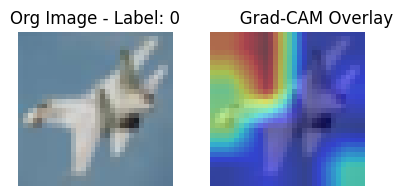

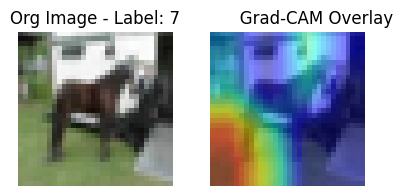

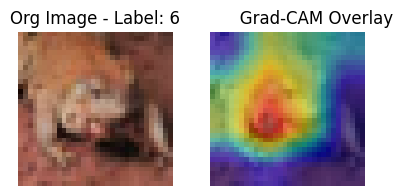

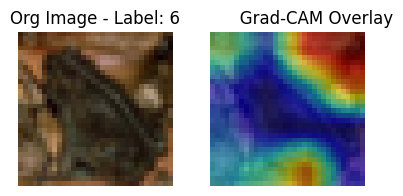

In [36]:
# Visualize Grad-CAM
image_index = [10,20,5,30]
ro = 0 # Initialize ro
for i in image_index:
  image = X_test[i]
  label = y_test[i].item() # Extract the scalar value from the array
  ro+=1
  heatmap = compute_gradcam(model, image, label)
# Resize heatmap to match input image, using 32x32 for CIFAR-10
  heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], [32, 32]).numpy().squeeze()
  plt.figure(figsize=(4, 2))
  plt.subplot(1, 2, 1)
  plt.imshow(image.squeeze()) # Removed cmap='gray' as it's an RGB image
  plt.title(f"Org Image - Label: {label}")
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(image.squeeze()) # Removed cmap='gray' as it's an RGB image
  plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
  plt.title("           Grad-CAM Overlay")
  plt.axis('off')
  plt.tight_layout()
  plt.show()